# Понимание того, зачем нужно производить нормализацию + понимание нюансов работы transforms.Normalize

In [17]:
import os
from pathlib import Path


import numpy as np

import torch
import torch.nn as nn

import torchvision
from torchvision import transforms

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from PIL import Image

%matplotlib inline

In [2]:
# выберем изображение, которое будет подопытным кроилком

In [15]:
!ls ../../../2__Courses/School_IT_SBER/School_Data_Science/NST_Gatys/example/content.jpg

../../../2__Courses/School_IT_SBER/School_Data_Science/NST_Gatys/example/content.jpg


In [19]:
img_abs_path = os.path.abspath("../../../2__Courses/School_IT_SBER/School_Data_Science/NST_Gatys/example/content.jpg")
img_abs_path

'C:\\Users\\kirill_ionkin\\Desktop\\proga\\2__Courses\\School_IT_SBER\\School_Data_Science\\NST_Gatys\\example\\content.jpg'

In [ ]:
# считаем изображение + уменьшим размер

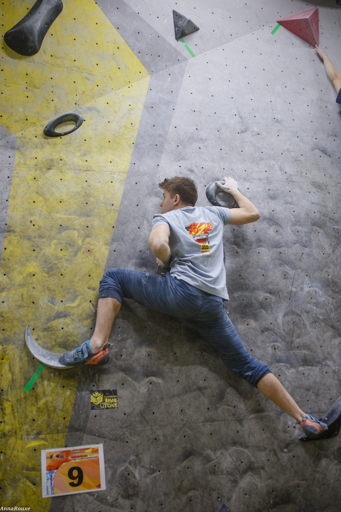

In [34]:
pil_image = Image.open(img_abs_path)
width, height = pil_image.size
aspect_ratio = height / width

h = 512
w = int(h / aspect_ratio)
pil_image_resize = pil_image.resize((w, h))
pil_image_resize

In [36]:
w, h = pil_image_resize.size
w, h

(341, 512)

## Numpy  - формат хранения данных - [0, 255]

In [37]:
# переведём данные в np.array

In [42]:
np_image = np.array(pil_image_resize)
np_image

array([[[118, 106,  13],
        [119, 108,  16],
        [119, 109,  26],
        ...,
        [ 22,  20,  20],
        [ 24,  22,  21],
        [ 37,  36,  37]],

       [[118, 108,  18],
        [121, 109,  19],
        [121, 112,  26],
        ...,
        [ 23,  21,  20],
        [ 34,  33,  30],
        [ 39,  38,  35]],

       [[118, 107,  32],
        [118, 107,  28],
        [ 92,  85,  30],
        ...,
        [ 29,  27,  29],
        [ 36,  35,  35],
        [ 36,  35,  34]],

       ...,

       [[139, 134, 119],
        [ 87,  83,  51],
        [181, 177, 161],
        ...,
        [ 41,  40,  33],
        [ 39,  38,  31],
        [ 41,  41,  34]],

       [[ 84,  78,  56],
        [ 62,  57,  25],
        [103,  99,  71],
        ...,
        [ 43,  41,  36],
        [ 41,  39,  34],
        [ 40,  39,  33]],

       [[ 49,  44,  14],
        [ 55,  52,  18],
        [ 55,  51,  17],
        ...,
        [ 49,  46,  38],
        [ 45,  42,  36],
        [ 44,  41,  36]]

In [44]:
# как можно заметить, числа в полученном массиве из [0, 255]
np_image.min(), np_image.max()

(0, 253)

In [43]:
np_image.shape

(512, 341, 3)

In [60]:
np_image.transpose(2, 0, 1).shape

(3, 512, 341)

In [94]:
# реализуем функцию для отрисовки распределения чисел
# по каждому из каналов + по всем каналам совместно

def plot_statistics(x, size_h=3, size_w=5):
    """
        x.shape = (c, h, w)
        type(x) = np.ndarray or torch.Tensor
    """
    if isinstance(x, torch.Tensor):
        x = x.numpy()
    
    c, h, w = x.shape
    
    fig, axes = plt.subplots(nrows=c+1, ncols=1)
    fig.set_size_inches((size_w, size_h * (c + 1)))
    
    for i, _ in enumerate(range(c)):
        x_i = x[i:i+1, :, :].ravel()
        axes[i].hist(x_i, density=True)
        axes[i].set_title(f"channel = {i}")
        
    axes[c].hist(x.ravel(), density=True)
    axes[c].set_title("all channels")
    
    plt.tight_layout()

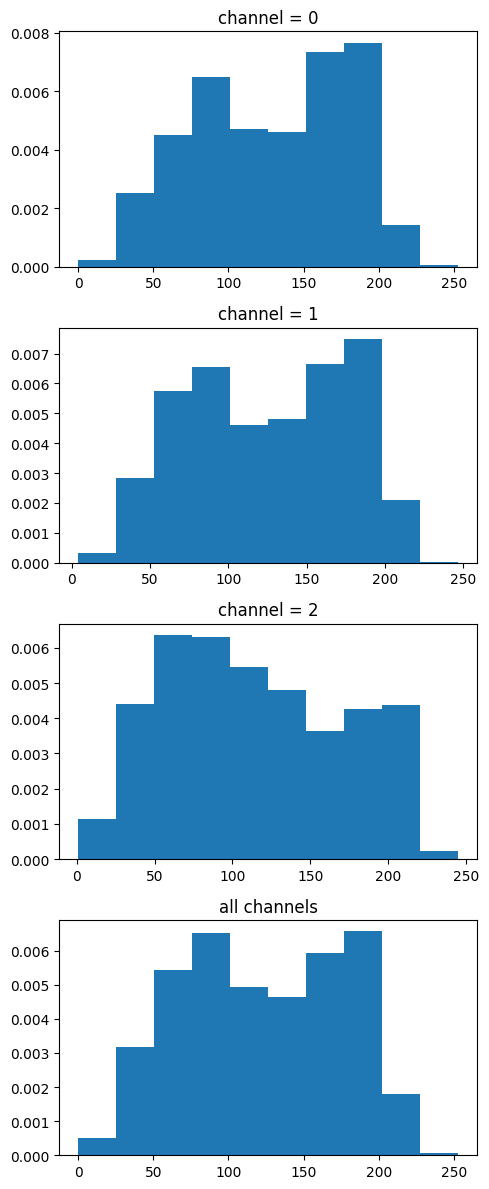

In [95]:
plot_statistics(np_image.transpose(2, 0, 1))

# Pytorch

In [ ]:
# переведём PIL image -> torch.Tensor

In [96]:
to_tensor = transforms.ToTensor()

In [99]:
pytorch_tensor = to_tensor(pil_image_resize)
pytorch_tensor

tensor([[[0.4627, 0.4667, 0.4667,  ..., 0.0863, 0.0941, 0.1451],
         [0.4627, 0.4745, 0.4745,  ..., 0.0902, 0.1333, 0.1529],
         [0.4627, 0.4627, 0.3608,  ..., 0.1137, 0.1412, 0.1412],
         ...,
         [0.5451, 0.3412, 0.7098,  ..., 0.1608, 0.1529, 0.1608],
         [0.3294, 0.2431, 0.4039,  ..., 0.1686, 0.1608, 0.1569],
         [0.1922, 0.2157, 0.2157,  ..., 0.1922, 0.1765, 0.1725]],

        [[0.4157, 0.4235, 0.4275,  ..., 0.0784, 0.0863, 0.1412],
         [0.4235, 0.4275, 0.4392,  ..., 0.0824, 0.1294, 0.1490],
         [0.4196, 0.4196, 0.3333,  ..., 0.1059, 0.1373, 0.1373],
         ...,
         [0.5255, 0.3255, 0.6941,  ..., 0.1569, 0.1490, 0.1608],
         [0.3059, 0.2235, 0.3882,  ..., 0.1608, 0.1529, 0.1529],
         [0.1725, 0.2039, 0.2000,  ..., 0.1804, 0.1647, 0.1608]],

        [[0.0510, 0.0627, 0.1020,  ..., 0.0784, 0.0824, 0.1451],
         [0.0706, 0.0745, 0.1020,  ..., 0.0784, 0.1176, 0.1373],
         [0.1255, 0.1098, 0.1176,  ..., 0.1137, 0.1373, 0.

In [100]:
pytorch_tensor.shape

torch.Size([3, 512, 341])

In [ ]:
# как можно заметить, трансформация ToTensor: [0, 255] -> [0, 1] + (h, w, c) -> (c, h, w)

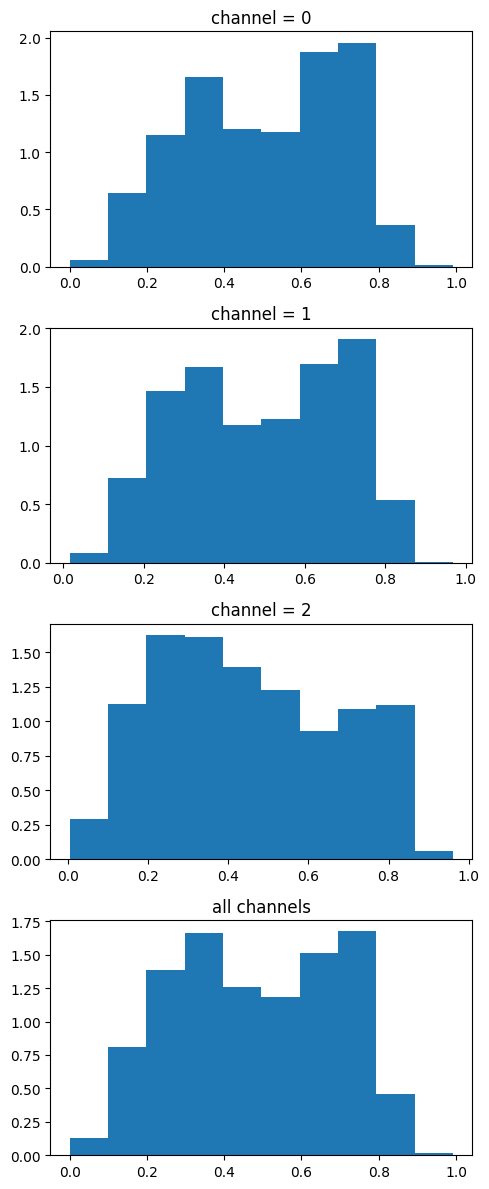

In [101]:
plot_statistics(pytorch_tensor)

In [102]:
normalize_tensor = transforms.Normalize(mean=0.5, std=0.5)

In [119]:
pytorch_normalize_tensor = normalize_tensor(pytorch_tensor)
pytorch_normalize_tensor

tensor([[[-0.0745, -0.0667, -0.0667,  ..., -0.8275, -0.8118, -0.7098],
         [-0.0745, -0.0510, -0.0510,  ..., -0.8196, -0.7333, -0.6941],
         [-0.0745, -0.0745, -0.2784,  ..., -0.7725, -0.7176, -0.7176],
         ...,
         [ 0.0902, -0.3176,  0.4196,  ..., -0.6784, -0.6941, -0.6784],
         [-0.3412, -0.5137, -0.1922,  ..., -0.6627, -0.6784, -0.6863],
         [-0.6157, -0.5686, -0.5686,  ..., -0.6157, -0.6471, -0.6549]],

        [[-0.1686, -0.1529, -0.1451,  ..., -0.8431, -0.8275, -0.7176],
         [-0.1529, -0.1451, -0.1216,  ..., -0.8353, -0.7412, -0.7020],
         [-0.1608, -0.1608, -0.3333,  ..., -0.7882, -0.7255, -0.7255],
         ...,
         [ 0.0510, -0.3490,  0.3882,  ..., -0.6863, -0.7020, -0.6784],
         [-0.3882, -0.5529, -0.2235,  ..., -0.6784, -0.6941, -0.6941],
         [-0.6549, -0.5922, -0.6000,  ..., -0.6392, -0.6706, -0.6784]],

        [[-0.8980, -0.8745, -0.7961,  ..., -0.8431, -0.8353, -0.7098],
         [-0.8588, -0.8510, -0.7961,  ..., -0

In [120]:
pytorch_normalize_tensor.shape

torch.Size([3, 512, 341])

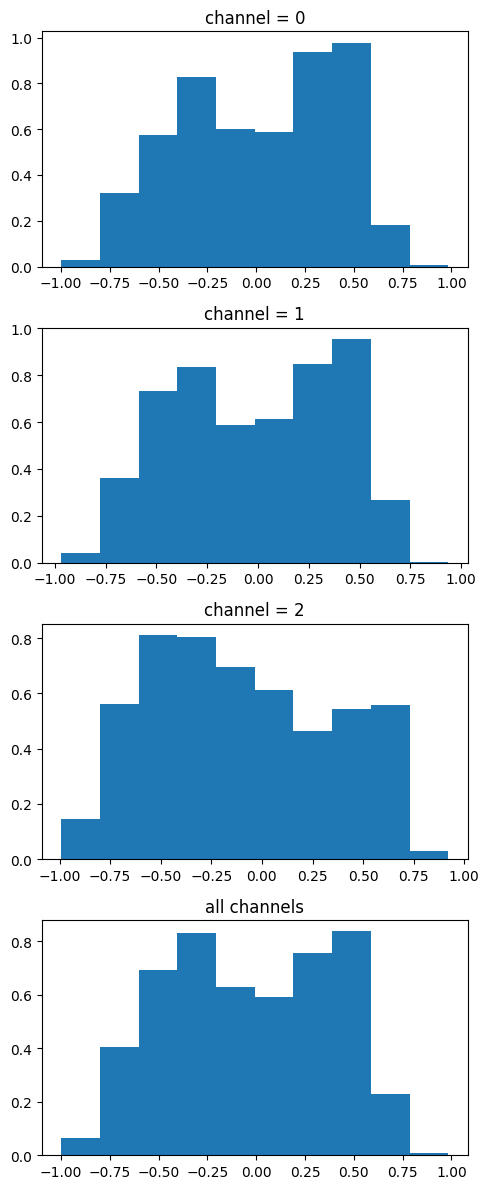

In [121]:
plot_statistics(pytorch_normalize_tensor)

In [122]:
pytorch_normalize_tensor.shape

torch.Size([3, 512, 341])

In [ ]:
# как можно заметить, нормализация пытается сместить распредление к нормальному

In [123]:
pytorch_tensor.mean(axis=[1,2])

tensor([0.5074, 0.4939, 0.4495])

In [124]:
pytorch_normalize_tensor.mean(axis=[1,2])

tensor([ 0.0149, -0.0122, -0.1009])

In [126]:
pytorch_tensor.std(axis=[1, 2])

tensor([0.1997, 0.1998, 0.2211])

In [117]:
pytorch_normalize_tensor.std(axis=[1, 2])

tensor([0.3993, 0.3996, 0.4423])

In [ ]:
# torch.Tensor -> np.array

In [137]:
tmp = ((pytorch_normalize_tensor.numpy().transpose(1, 2, 0) * 0.5 + 0.5) * 255)
tmp

array([[[118.      , 106.      ,  12.999999],
        [119.      , 108.      ,  15.999999],
        [119.      , 109.      ,  25.999998],
        ...,
        [ 21.999998,  19.999998,  19.999998],
        [ 23.999998,  21.999998,  20.999998],
        [ 36.999996,  35.999996,  36.999996]],

       [[118.      , 108.      ,  17.999998],
        [121.      , 109.      ,  18.999998],
        [121.      , 112.      ,  25.999998],
        ...,
        [ 22.999998,  20.999998,  19.999998],
        [ 33.999996,  32.999996,  29.999998],
        [ 38.999996,  37.999996,  34.999996]],

       [[118.      , 107.      ,  31.999998],
        [118.      , 107.      ,  27.999998],
        [ 92.      ,  85.      ,  29.999998],
        ...,
        [ 28.999998,  26.999998,  28.999998],
        [ 35.999996,  34.999996,  34.999996],
        [ 35.999996,  34.999996,  33.999996]],

       ...,

       [[139.      , 134.      , 119.      ],
        [ 87.      ,  83.      ,  50.999996],
        [181.      , 1

In [138]:
tmp.min(), tmp.max()

(0.0, 253.0)

In [140]:
finish = tmp.clip(0, 255)

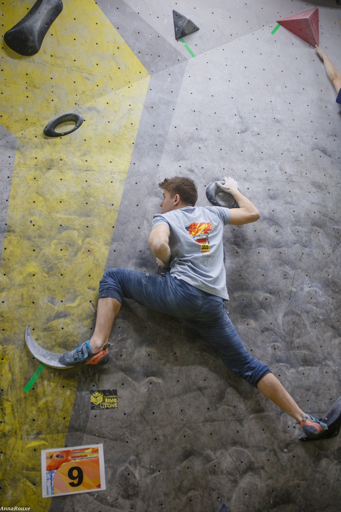

In [141]:
Image.fromarray(np.uint8(finish))

In [ ]:
# как можно заметить, обратная нормализация и последующее приведение масштаба позволило восстановить изображение!



# Вывод: 

Нужно крайне аккуратно и чётко понимать то, какое распределение мы получаем на выходе из нейронок, чтобы правильно
производить денормализацию, если это необходимо!

In [ ]:
# а что, если не делать денормализацию!?


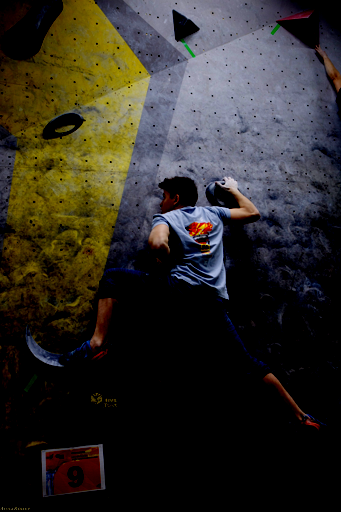

In [142]:
Image.fromarray(np.uint8(((pytorch_normalize_tensor.numpy().transpose(1, 2, 0) * 255).clip(0, 255))))

In [ ]:
# как можно заметить, результат отличается от оригинала, что говорит о том, что денормализация была проделена не правильно!